In [71]:
import pandas as pd

data=pd.read_csv('HousingData.csv')

TRAIN TEST SPLIT

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop('MEDV',axis=1), data['MEDV'], test_size=0.1, random_state=42)

FINDING NISSING DATA

In [94]:
X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [95]:
X_test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

FILLINF THE MISSING DATA

In [75]:
missing_data_columns=list(X_train.columns[X_train.isnull().sum()>0])

In [76]:

for column in missing_data_columns:
    if column=='INDUS':
        mean=X_train[column].mean()
        X_train[column]=X_train[column].fillna(mean)
        X_test[column]=X_test[column].fillna(mean)
        
    else:
        median=X_train[column].median()
        print(median)
        X_train[column]=X_train[column].fillna(median)
        X_test[column]=X_test[column].fillna(median)
        
                                         
        
            
        
        

0.26363
0.0
0.0
76.7
11.035


FINDING OUTLIERS

In [77]:
import matplotlib.pyplot as plt

import seaborn as sns

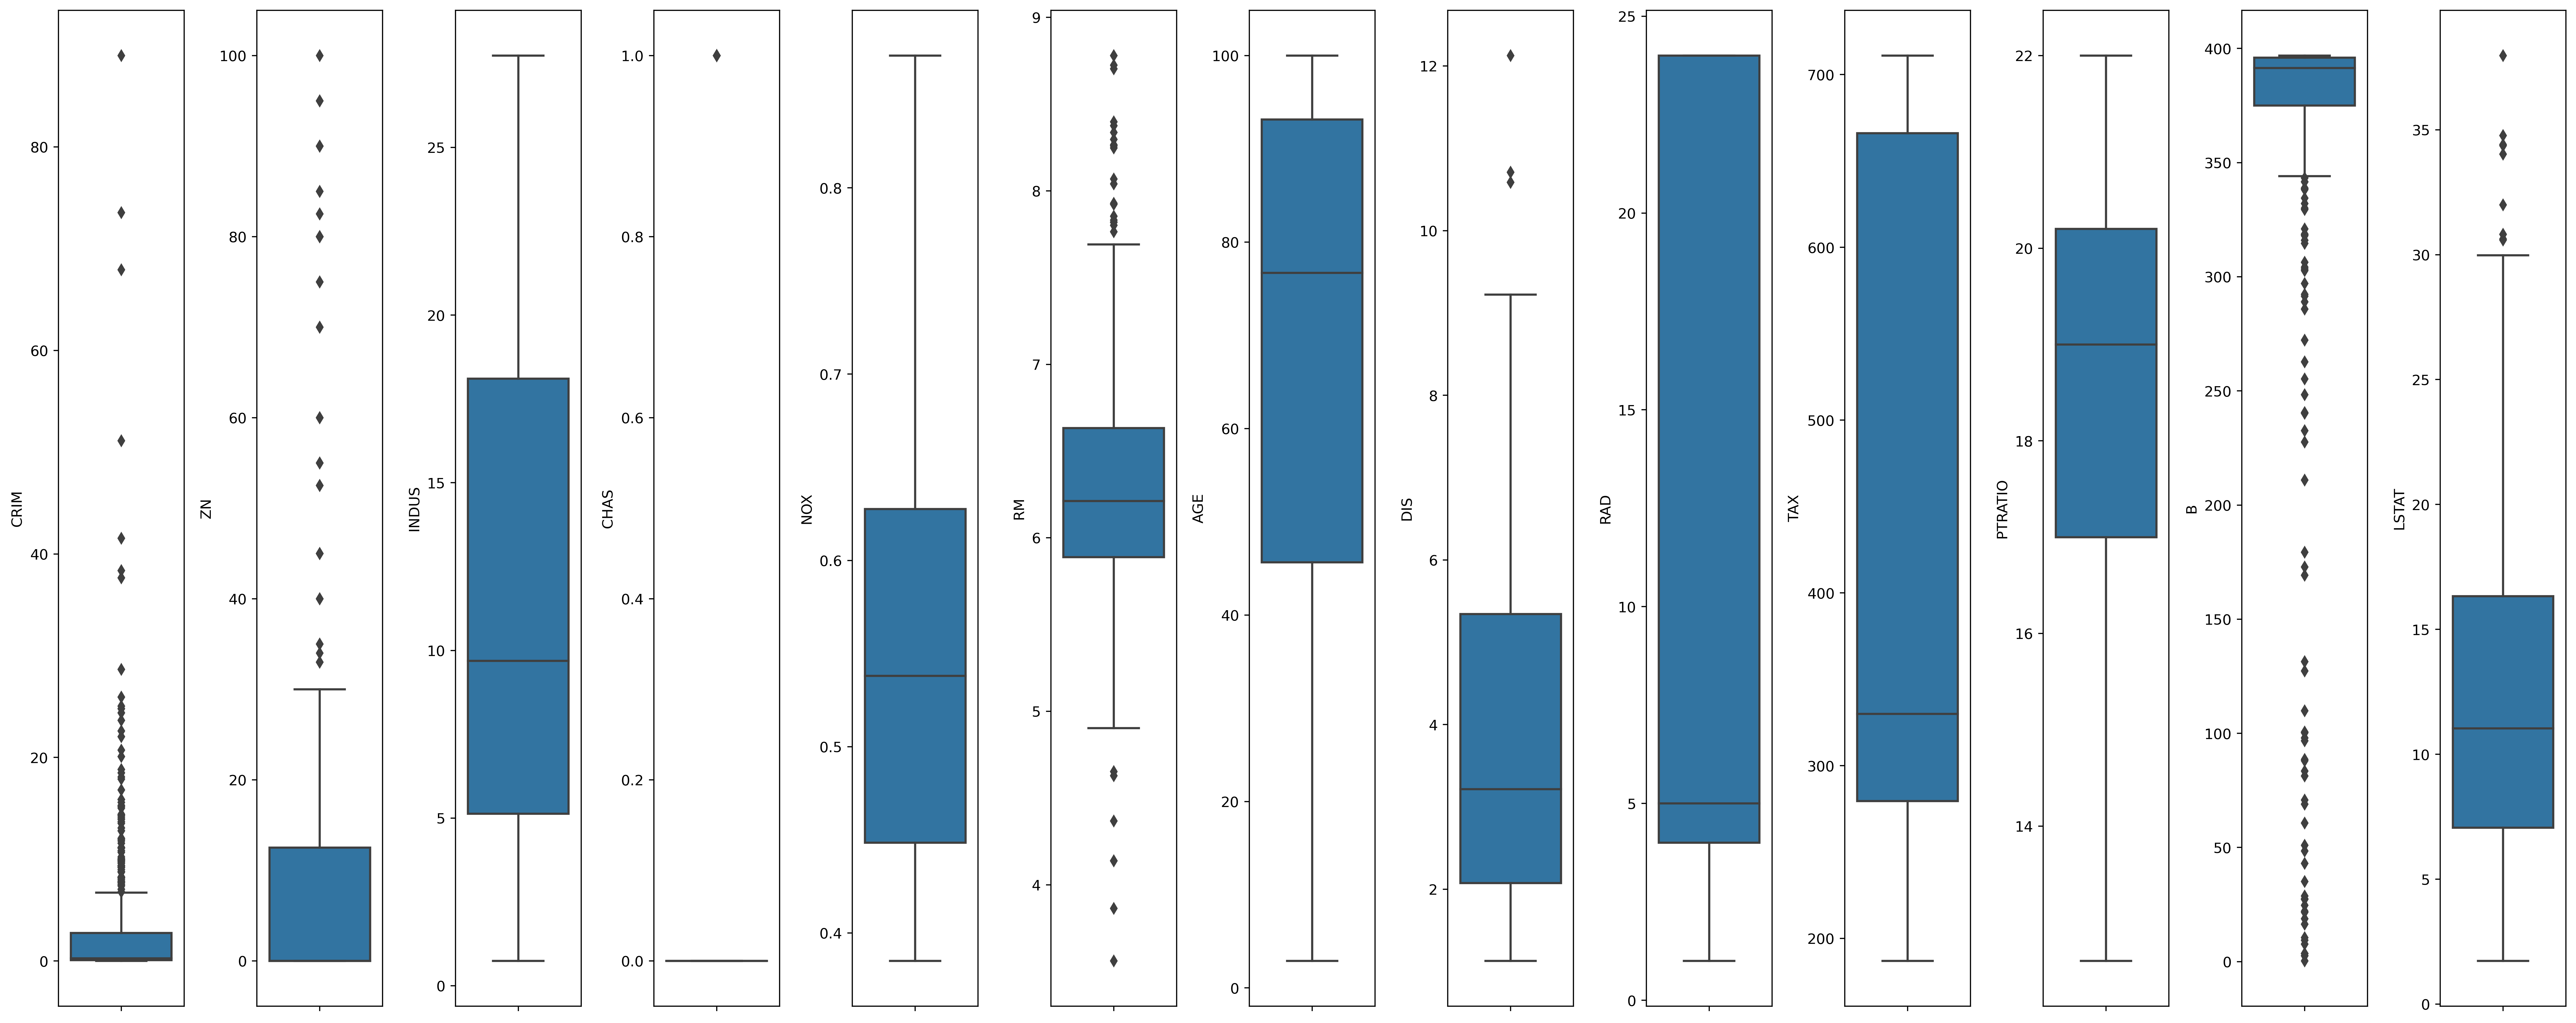

In [78]:
fig,ax=plt.subplots(ncols=13,nrows=1,figsize=(25,10),dpi=400)
i=0

for column in X_train.columns:

    sns.boxplot(data=X_train,y=column,ax=ax[i])
    i=i+1
    
plt.tight_layout()

CAPPING OUTLIERS NOT REMOVING BECAUSE DATA IS VERY SMALLL

In [79]:
def finding_cap(var):
    a=pd.DataFrame(data.loc[X_train.index]['MEDV'])

    b=pd.DataFrame(X_train[var])

    cor_value=pd.concat((a,b),axis=1).corr()['MEDV'].iloc[1]
    print(cor_value)
    print('\n')
    
    
    for x in range(2,4):
        
        
        
        diff=X_train[var].quantile(0.75)-X_train[var].quantile(0.25)

        upper_limit=X_train[var].quantile(0.75)+x*diff

        lower_limit=X_train[var].quantile(0.25)-x*diff
         
        print(upper_limit)
        def fun(num):
            if num>upper_limit:
                return upper_limit
            elif num<lower_limit:
                return lower_limit
            else:
                return num
    
        
        a=pd.DataFrame(X_train[var].apply(fun))
        a['final']=data.loc[a.index]['MEDV']
        
        cor=a.corr()[var].iloc[1]
        print(cor)
        
        print('\n')
        
        
    x=int(input('ENTER MULTIPLE VALUE:'))
    if x in [2,3]:
        diff=X_train[var].quantile(0.75)-X_train[var].quantile(0.25)

        upper_limit=X_train[var].quantile(0.75)+x*diff

        lower_limit=X_train[var].quantile(0.25)-x*diff
        a=pd.DataFrame(X_train[var].apply(fun))
        X_train[var]=a
        print('SUCCESS')
        
    else:
        pass
        

In [80]:
for column in X_train.columns:
    finding_cap(column)

-0.382667081046406


8.105474999999998
-0.4484652422013726


10.779784999999999
-0.45906400352338567


ENTER MULTIPLE VALUE:3
SUCCESS
0.32672826731415305


37.5
0.3506882368920561


50.0
0.33994967991188074


ENTER MULTIPLE VALUE:2
SUCCESS
-0.46907139076280296


44.040000000000006
-0.46907139076280285


57.01000000000001
-0.46907139076280285


ENTER MULTIPLE VALUE:4
0.18960743954002263


0.0
nan


0.0
nan


ENTER MULTIPLE VALUE:4
-0.41886348717348904


0.9854999999999998
-0.41886348717348915


1.1644999999999999
-0.41886348717348915


ENTER MULTIPLE VALUE:4
0.6876227460905611


8.122
0.6994669528123248


8.866499999999998
0.6885364286020154


ENTER MULTIPLE VALUE:2
SUCCESS
-0.35620068996859494


188.15
-0.35620068996859494


235.65
-0.35620068996859494


ENTER MULTIPLE VALUE:4
0.23588945237637182


11.881199999999998
0.23591324655261736


15.149799999999997
0.23588945237637177


ENTER MULTIPLE VALUE:4
-0.38294479175796936


64.0
-0.3829447917579693


84.0
-0.3829447917579693


ENTER MU

#### COMPARING BOX PLOT OF NEW CAPPED AND ORIGNAL DATA

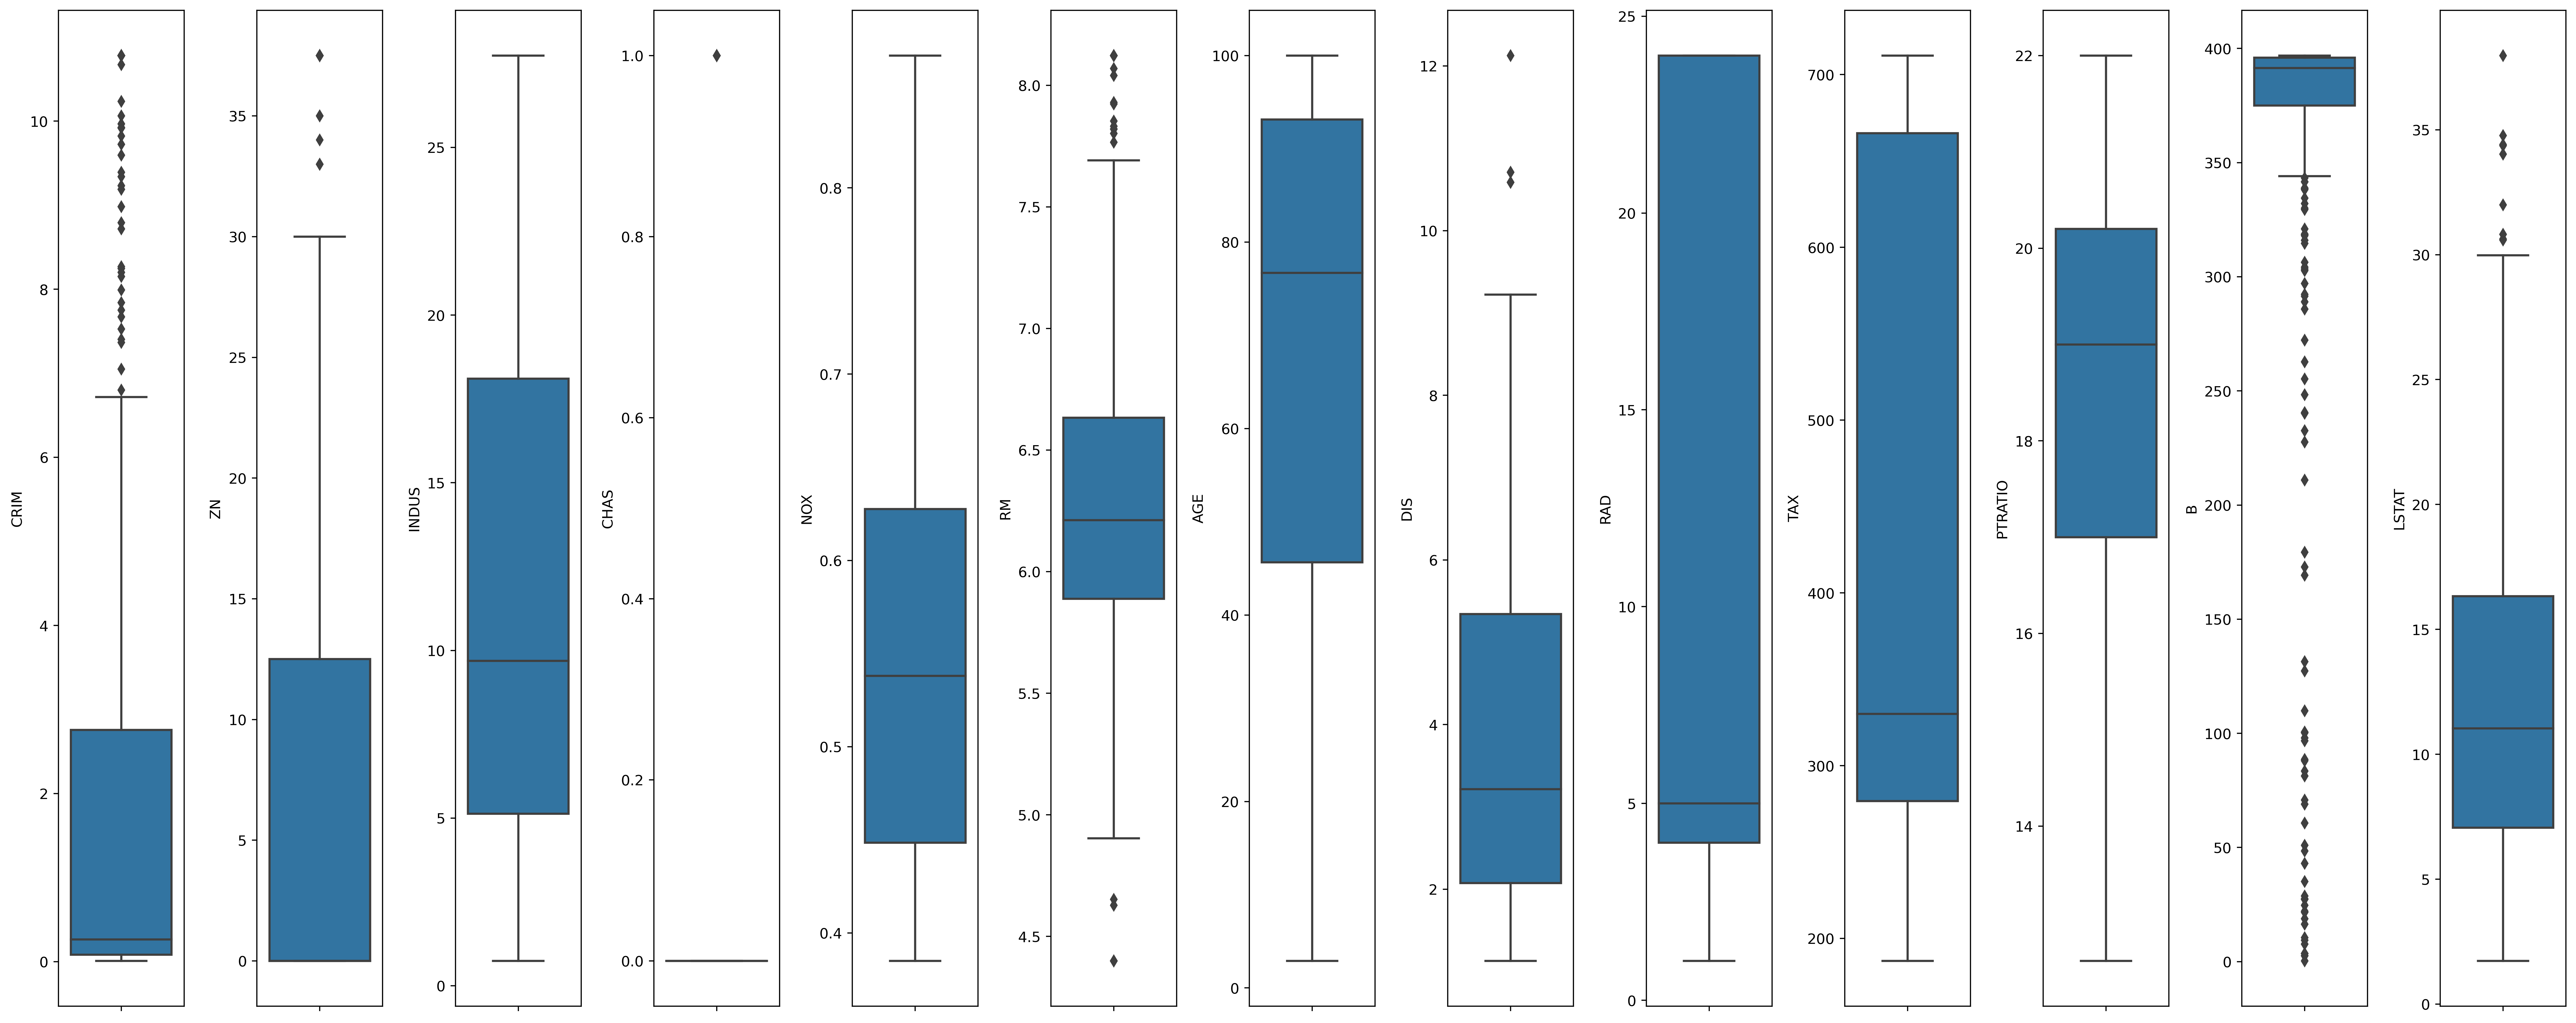

In [81]:
fig,ax=plt.subplots(ncols=13,nrows=1,figsize=(25,10),dpi=400)
i=0

for column in X_train.columns:

    sns.boxplot(data=X_train,y=column,ax=ax[i])
    i=i+1
    
plt.tight_layout()

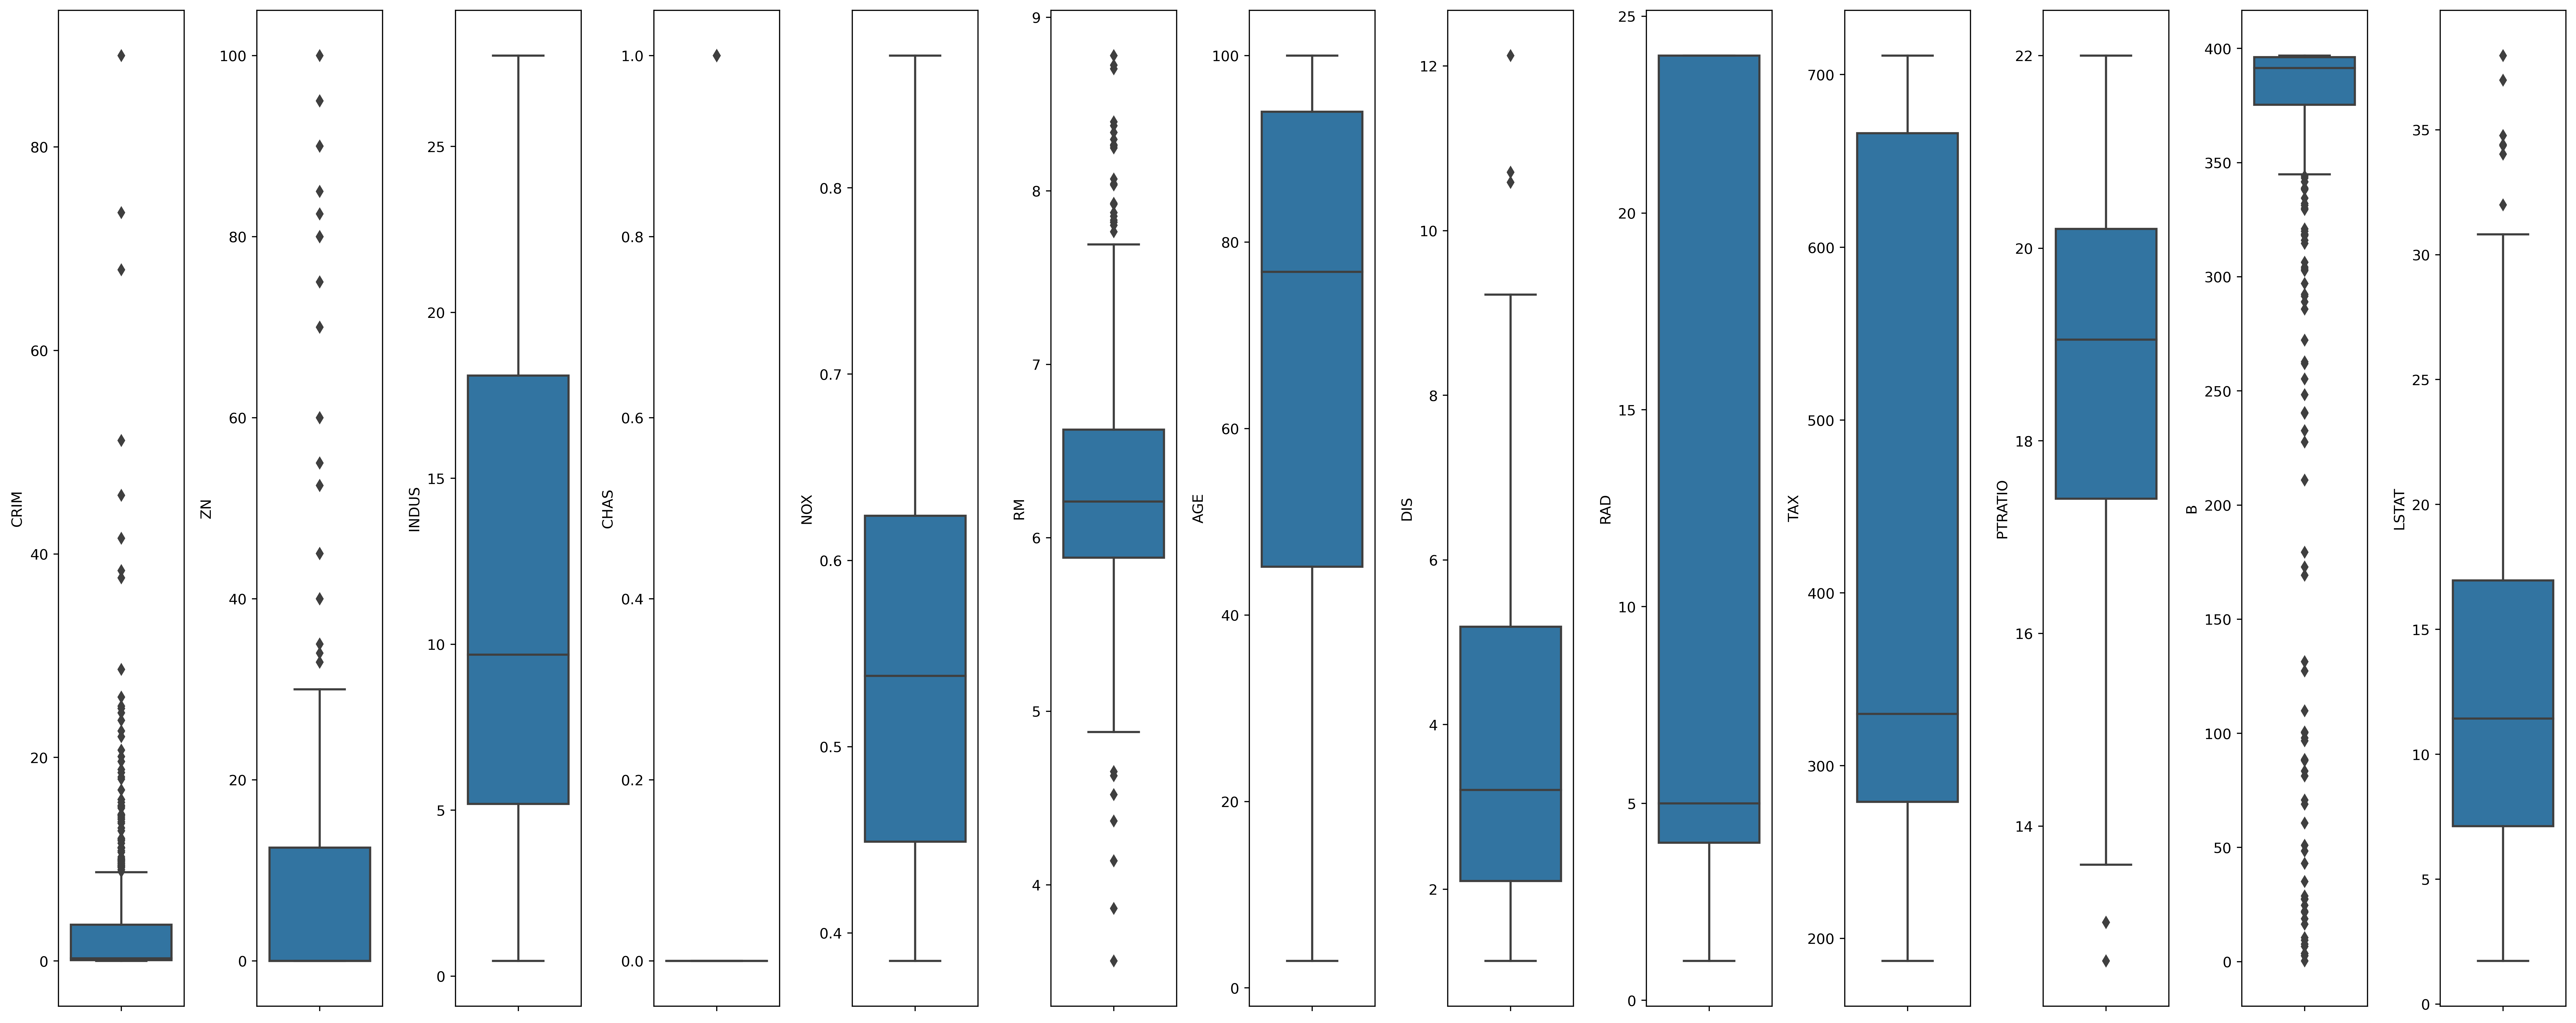

In [82]:
fig,ax=plt.subplots(ncols=13,nrows=1,figsize=(25,10),dpi=400)
i=0

for column in X_train.columns:

    sns.boxplot(data=data,y=column,ax=ax[i])
    i=i+1
    
plt.tight_layout()

MAKING KDEPLOT TO UNDERSTAND DISTRIBUTION

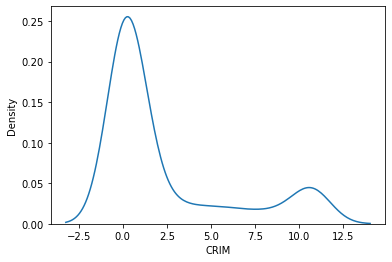

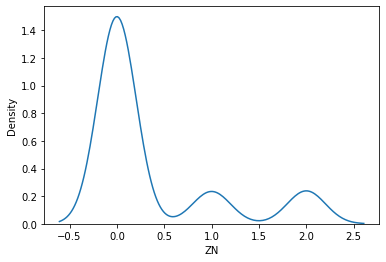

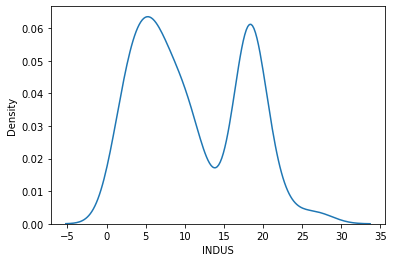

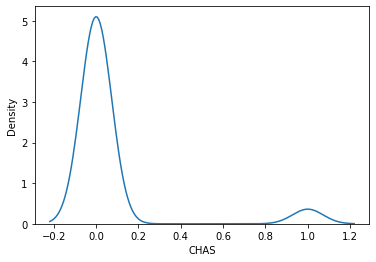

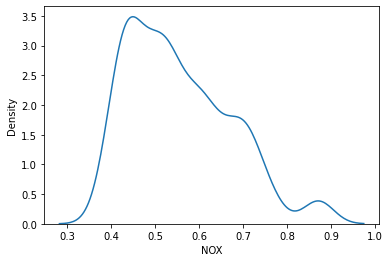

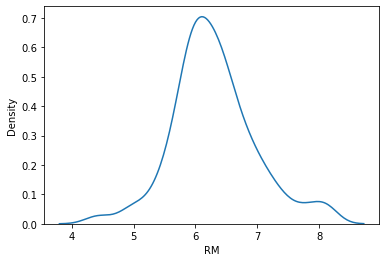

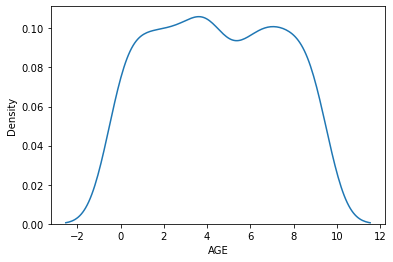

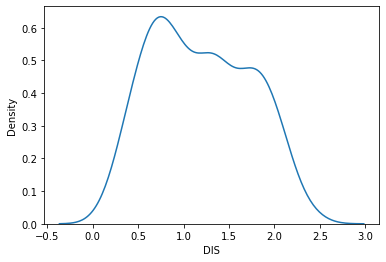

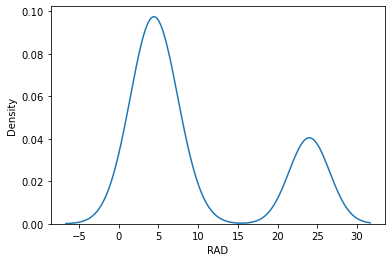

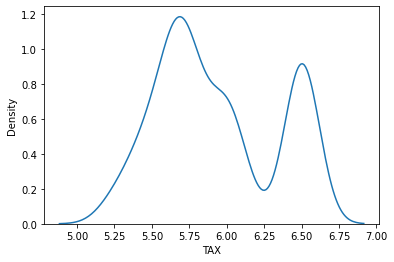

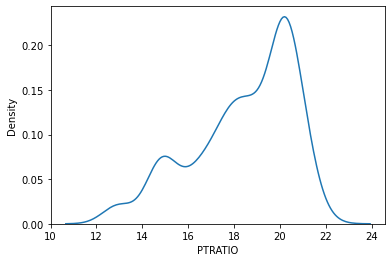

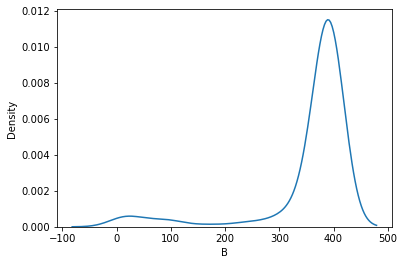

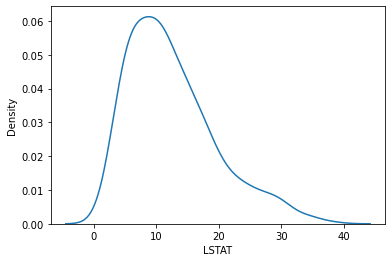

In [132]:
for column in X_train.columns:
    sns.kdeplot(data=X_train,x=column)
    plt.show()
    

In [83]:
skewed_columns=['CRIM','ZN','AGE','DIS','TAX','B']

In [84]:
for column in skewed_columns:
    print(column)
    print(X_train[column].min())

CRIM
0.00906
ZN
0.0
AGE
2.9
DIS
1.1296
TAX
187
B
0.32


APPLYING LOG/POWER TRANSFORMATION ON SKEWED VARIABLES

In [85]:
import numpy as np

In [92]:
a=X_train['B']

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,B,MEDV
B,1.000000,0.339737
MEDV,0.339737,1.000000


In [93]:
a=np.log(X_train['B'])

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,B,MEDV
B,1.000000,0.291179
MEDV,0.291179,1.000000


In [91]:
X_train['DIS']=np.log(X_train['DIS'])
X_test['DIS']=np.log(X_test['DIS'])

In [49]:
from sklearn.preprocessing import PowerTransformer

In [64]:
trans=PowerTransformer(method='box-cox')

In [65]:
a=X_train['ZN']

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,CRIM,MEDV
CRIM,1.000000,-0.459064
MEDV,-0.459064,1.000000


In [69]:
a=pd.DataFrame(trans.fit_transform(pd.DataFrame(X_train['B'])))

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,0,MEDV
0,1.000000,-0.006272
MEDV,-0.006272,1.000000


DISCRETISATION ON SKEWED VARIABLES

In [96]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [97]:
skewed_columns=['CRIM','ZN','AGE','B']

In [121]:
a=X_train['ZN']

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,ZN,MEDV
ZN,1.000000,0.350688
MEDV,0.350688,1.000000


In [130]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['AGE'])##return_object=False ,would return in form of range and true in bins

a=disc.fit_transform(pd.DataFrame(X_train['AGE']))

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,AGE,MEDV
AGE,1.000000,-0.377603
MEDV,-0.377603,1.000000


In [131]:
X_train['AGE']=disc.fit_transform(pd.DataFrame(X_train['AGE']))
X_test['AGE']=disc.transform(pd.DataFrame(X_test['AGE']))

FINDING CORR BETWEEN ALL COLUMNS TO FIND HIGHLY COREALATED FEATURES

<AxesSubplot:>

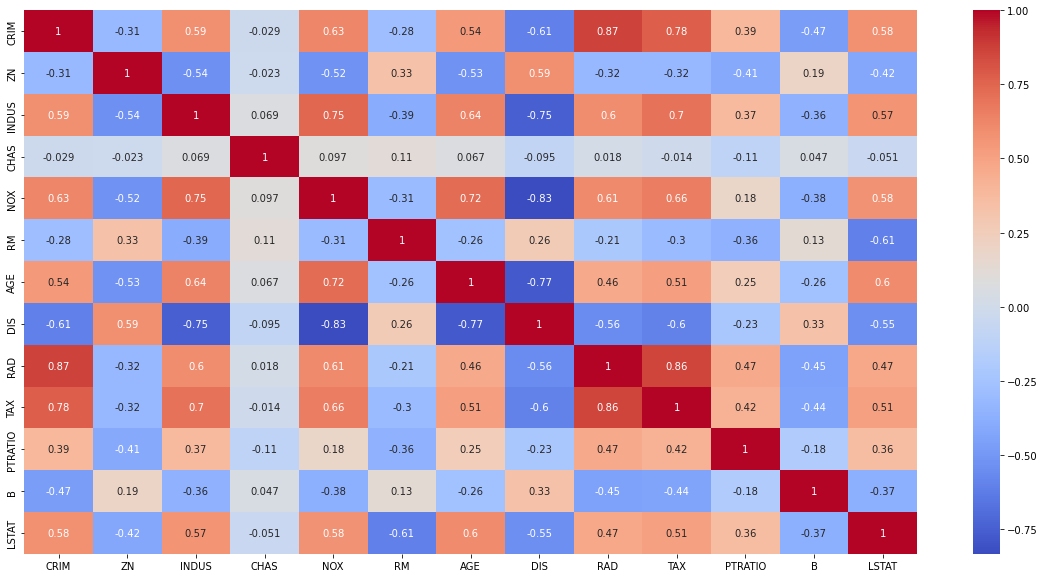

In [134]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

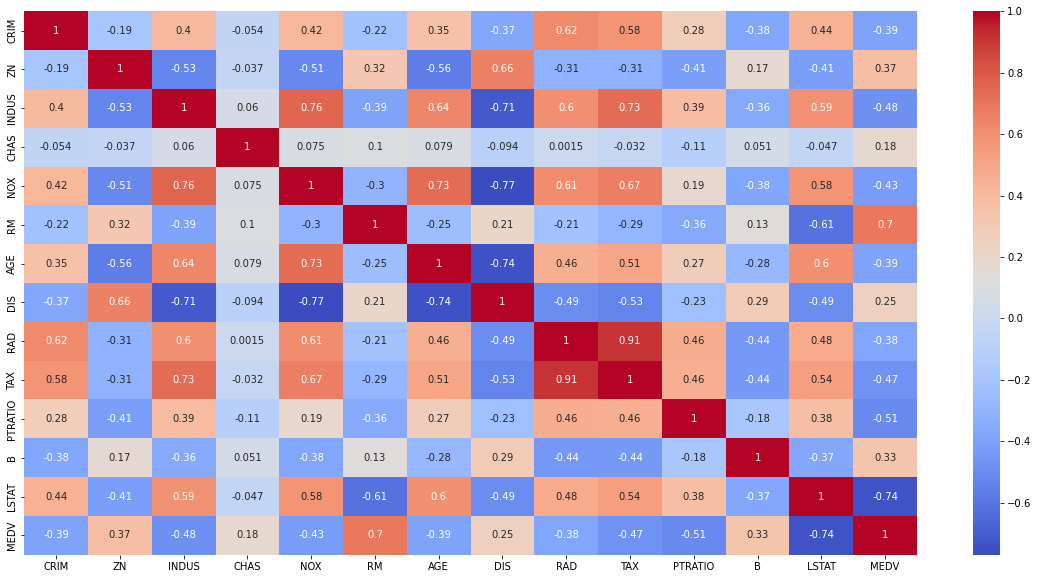

In [167]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [173]:
a=X_train['CRIM']*X_train['RAD']

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,0,MEDV
0,1.000000,-0.446859
MEDV,-0.446859,1.000000


In [174]:
a=X_train['NOX']*X_train['DIS']

b=data.loc[X_train.index]['MEDV']

pd.concat((a,b),axis=1).corr()

,0,MEDV
0,1.000000,0.181698
MEDV,0.181698,1.000000


PREPARING MODEL-1

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [305]:
def train(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    cv_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
    print(cv_score)
    cv_score=np.abs(np.mean(cv_score))
    print('TRAIN MSE',mean_squared_error(y_train,model.predict(X_train)))
    print('MSE TEST:',mean_squared_error(y_test,pred))
    print('CROSS VAL:',cv_score)
    

In [274]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

TRAIN MSE 21.946620616115034
MSE TEST: 22.47626941249202
CROSS VAL: 23.55759547154895


<AxesSubplot:>

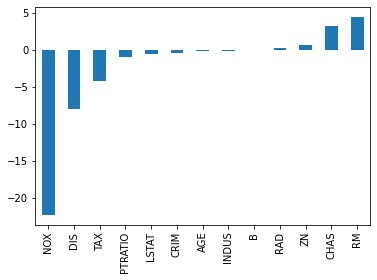

In [242]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(normalize=True)
train(model)
coef=pd.Series(model.coef_,X_train.columns).sort_values()
coef.plot(kind='bar')

TRAIN MSE 0.0
MSE TEST: 35.242745098039215
CROSS VAL: 31.024725274725274


<AxesSubplot:>

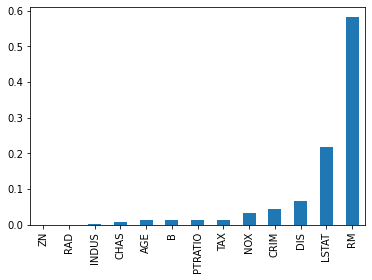

In [243]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

RANDOM FOREST MOD-1

TRAIN MSE 2.0099575120879125
MSE TEST: 9.321892843137261
CROSS VAL: 14.555609279120882


<AxesSubplot:>

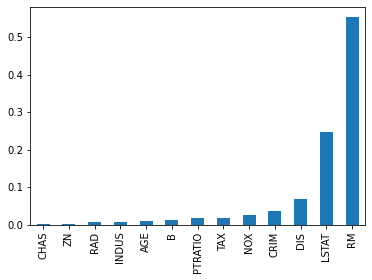

In [244]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

In [342]:
rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 3, verbose = True, n_jobs = 2,scoring='neg_mean_squared_error')
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
Random Forest
Best Score: -12.168240207177353
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [348]:
mod=best_clf_rf.best_estimator_

In [349]:
train(mod)

[-12.39343967 -14.73069225  -9.33866138 -11.66499892 -11.52881666]
TRAIN MSE 0.4407517599509127
MSE TEST: 4.546188336902312
CROSS VAL: 11.931321775835666


EXTRA TREE REG MOD-1

TRAIN MSE 1.0602966732660587e-27
MSE TEST: 4.340196
CROSS VAL: 12.480630257142858


<AxesSubplot:>

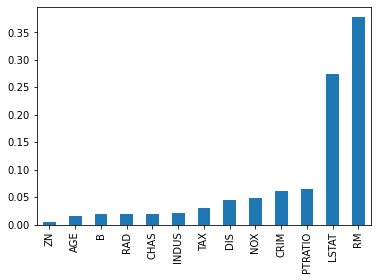

In [245]:
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

In [362]:
et = ExtraTreesRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_et_rnd = RandomizedSearchCV(et, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_et_rnd = clf_et_rnd.fit(X_train,y_train)
clf_performance(best_clf_et_rnd,'Extra Tree REGRESSOR')


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Extra Tree REGRESSOR
Best Score: -12.217960089054973
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}


In [364]:
train( best_clf_et_rnd.best_estimator_)

[-13.00262078 -13.81785516 -13.78886186 -10.80027237  -9.68019028]
TRAIN MSE 2.3643447779565316e-26
MSE TEST: 4.165048429803894
CROSS VAL: 12.217960089054973


XGBOOST REG MOD-1

In [235]:
import xgboost

TRAIN MSE 0.0008284565484244416
MSE TEST: 4.095143153748323
CROSS VAL: 13.37030653097751


<AxesSubplot:>

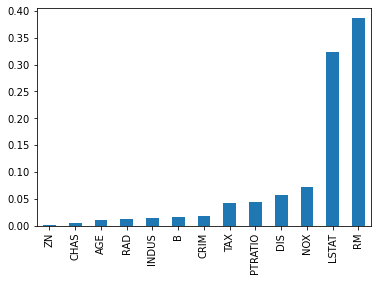

In [246]:
model=xgboost.XGBRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train.columns).sort_values()
coef.plot(kind='bar')

In [351]:
from sklearn.model_selection import RandomizedSearchCV

In [355]:
xgb = xgboost.XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = 2, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\anaconda_latest\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ -41.63805593           nan  -16.3750891            nan  -12.34445893
  -14.30039686           nan           nan  -11.6338734   -15.02155405
           nan           nan  -32.94428228           nan  -16.12618903
  -32.17142754  -37.38900217  -17.80557183           nan  -20.54278344
           nan           nan           nan           nan           nan
 -236.76473969           nan  -40.28217759           nan           nan
           nan           nan           nan  -13.2507015   -33.19906516
           nan           nan           nan  -20.33102066  -20.61633042
  -17.19210983 -240.03107401  -12.61736065           nan  -37.71222095
           nan  -12.99604366           nan  -38.02708022           nan
  -29.92942559           nan           nan           nan           nan
           nan           nan  -19.89980227           nan           nan
  -13.72020

XGB
Best Score: -11.39924323316942
Best Parameters: {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': None, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [360]:
xgb = xgboost.XGBRegressor(random_state = 1)
param_grid = {
    'n_estimators': [1000,1100,1500],
    'colsample_bytree': [0.65,0.7,0.75],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [1.25,1.5,1.75],
    'subsample': [0.75,0.8,0.85],
    'learning_rate':[0.01,0.05],
    'gamma':[0.1,0.5],
    'min_child_weight':[1,3,7],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1,)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
XGB
Best Score: 0.8723086224530563
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 1, 'reg_lambda': 1.75, 'sampling_method': 'uniform', 'subsample': 0.8}


In [361]:
train( best_clf_xgb.best_estimator_)

[ -9.30605829 -14.78365539 -11.10293539 -10.56852006  -9.10437253]
TRAIN MSE 0.12722246533259476
MSE TEST: 4.550524401752836
CROSS VAL: 10.973108330684937


In [373]:
train(best_clf_xgb_rnd.best_estimator_)

TRAIN MSE 0.4647232141450158
MSE TEST: 4.356612285097571
CROSS VAL: 11.937232013681871


In [358]:
train(mod_xgb)

[ -8.88149674 -15.82626949 -11.54541547 -11.38277286  -9.36026161]
TRAIN MSE 0.4523200030150623
MSE TEST: 3.8038196120092294
CROSS VAL: 11.39924323316942


MODEL-2 MULTIPLYING CRIM AND RAD TO FORMNEW COLUMN CALLED 'NEW'

In [238]:
X_train_2=X_train.copy()
X_train_2['new']=X_train['CRIM']*X_train['RAD']


X_train_2=X_train_2.drop(['CRIM','RAD'],axis=1)

In [249]:
X_test_2=X_test.copy()
X_test_2['new']=X_test['CRIM']*X_test['RAD']


X_test_2=X_test_2.drop(['CRIM','RAD'],axis=1)

In [365]:
def train(model):
    model.fit(X_train_2,y_train)
    pred=model.predict(X_test_2)
    
    cv_score=cross_val_score(model,X_train_2,y_train,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print('TRAIN MSE',mean_squared_error(y_train,model.predict(X_train_2)))
    print('MSE TEST:',mean_squared_error(y_test,pred))
    print('CROSS VAL:',cv_score)
    

TRAIN MSE 22.740819715016926
MSE TEST: 17.396093065651954
CROSS VAL: 24.17637138092399


<AxesSubplot:>

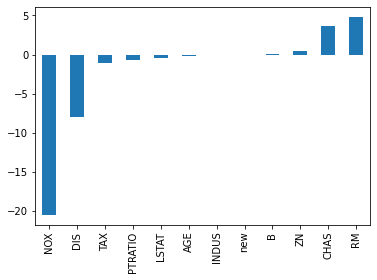

In [253]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(normalize=True)
train(model)
coef=pd.Series(model.coef_,X_train_2.columns).sort_values()
coef.plot(kind='bar')

TRAIN MSE 0.0
MSE TEST: 30.668823529411767
CROSS VAL: 25.73685714285714


<AxesSubplot:>

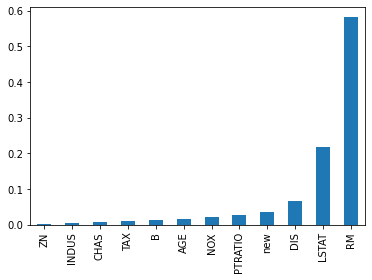

In [254]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train_2.columns).sort_values()
coef.plot(kind='bar')

RANDOM FOREST MOD-2

TRAIN MSE 2.2315587098901113
MSE TEST: 8.257310647058835
CROSS VAL: 14.921167259340654


<AxesSubplot:>

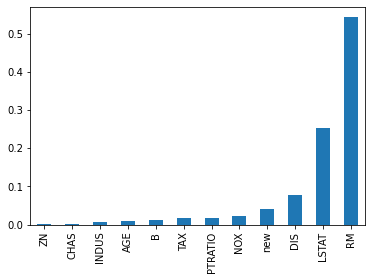

In [255]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train_2.columns).sort_values()
coef.plot(kind='bar')

In [366]:
rf = RandomForestRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd_2= RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 500, cv = 5, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_rf_rnd_2 = clf_rf_rnd_2.fit(X_train_2,y_train)
clf_performance(best_clf_rf_rnd_2,'Random Forest')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Random Forest
Best Score: -11.431961954056735
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [369]:
train(best_clf_rf_rnd_2.best_estimator_)

TRAIN MSE 2.0888750083225377e-05
MSE TEST: 4.526407092128176
CROSS VAL: 11.431961954056735


EXTRA TREE REG MOD-2

TRAIN MSE 1.0602966732660587e-27
MSE TEST: 4.478823941176465
CROSS VAL: 12.747813861538457


<AxesSubplot:>

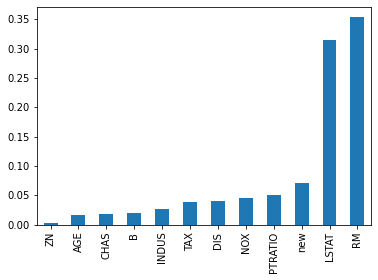

In [256]:
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train_2.columns).sort_values()
coef.plot(kind='bar')

In [367]:
et = ExtraTreesRegressor(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_et_rnd_2= RandomizedSearchCV(et, param_distributions = param_grid, n_iter = 500, cv = 5, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_et_rnd_2 = clf_et_rnd_2.fit(X_train_2,y_train)
clf_performance(best_clf_et_rnd_2,'EXTRA TREE REG')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
EXTRA TREE REG
Best Score: -12.290297268681307
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [370]:
train(best_clf_et_rnd_2.best_estimator_)

TRAIN MSE 1.4571428571438204e-05
MSE TEST: 5.110585549019609
CROSS VAL: 12.290297268681307


XGB REGMOD-2

TRAIN MSE 0.001510890975734323
MSE TEST: 4.138792979393341
CROSS VAL: 14.79581586358565


<AxesSubplot:>

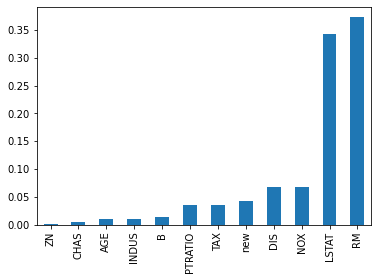

In [257]:
model=xgboost.XGBRegressor()
train(model)
coef=pd.Series(model.feature_importances_,X_train_2.columns).sort_values()
coef.plot(kind='bar')

In [368]:
xgb = xgboost.XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb_rnd_2 = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 500, cv = 5, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_xgb_rnd_2 = clf_xgb_rnd_2.fit(X_train_2,y_train)
clf_performance(best_clf_xgb_rnd_2,'XGB')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\anaconda_latest\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [          nan  -13.81705411           nan  -28.76851378  -13.82119736
 -238.09048531           nan           nan           nan           nan
 -104.75607634  -13.03448444           nan           nan -417.93866593
           nan           nan -122.42378792           nan  -20.9666953
  -12.53404916  -13.04620137  -40.39673627  -18.98814456           nan
  -14.96237554  -67.92474058           nan  -28.69000089           nan
 -234.65912789           nan           nan  -14.36809481  -24.82934154
  -14.6536673            nan           nan           nan  -22.44971464
  -39.07713279  -17.7926581            nan           nan  -22.51997618
  -14.96361922  -12.98969136  -13.06974322           nan  -14.8572165
 -113.50289145           nan           nan           nan           nan
 -123.51098191  -54.15746363           nan           nan  -12.25447738
           na

XGB
Best Score: -11.212829099138999
Best Parameters: {'subsample': 0.6, 'sampling_method': 'uniform', 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}


In [371]:
train(best_clf_xgb_rnd_2.best_estimator_)

TRAIN MSE 0.17882401326811231
MSE TEST: 3.800391573099905
CROSS VAL: 11.212829099138999


In [372]:
xgb = xgboost.XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [1000,1200],
    'colsample_bytree': [0.65,0.7,0.75],
    'max_depth': [8,10,12],
    'reg_alpha': [1],
    'reg_lambda': [1],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.05,0.1],
    'gamma':[1,5],
    'min_child_weight':[1,5],
    'sampling_method': ['uniform']
}

clf_xgb_2 = GridSearchCV(xgb, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1,scoring='neg_mean_squared_error')
best_clf_xgb_2 = clf_xgb_2.fit(X_train_2,y_train)
clf_performance(best_clf_xgb_2,'XGB')

Fitting 4 folds for each of 432 candidates, totalling 1728 fits
XGB
Best Score: -11.5356042656045
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 5, 'learning_rate': 0.05, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 1, 'reg_lambda': 1, 'sampling_method': 'uniform', 'subsample': 0.55}


In [374]:
train(best_clf_xgb_2.best_estimator_)

TRAIN MSE 0.6775599568788933
MSE TEST: 4.880206687966642
CROSS VAL: 11.534024928193503
